In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("FuelConsumption.csv")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [60]:
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [61]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [62]:
df = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB' , 'CO2EMISSIONS']]

In [63]:
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [70]:
x = df[['ENGINESIZE']]

In [71]:
y = df[['CO2EMISSIONS']]

Text(0.5, 1.0, 'Before using Simple Linear Regression Method')

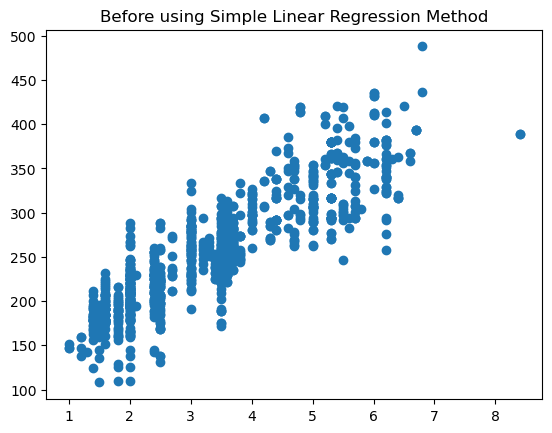

In [98]:
plt.scatter(x,y)
plt.title("Before using Simple Linear Regression Method")

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [75]:
xtrain.shape

(853, 1)

In [76]:
xtest.shape

(214, 1)

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
slr = LinearRegression()

In [79]:
slr.fit(xtrain, ytrain)

LinearRegression()

In [80]:
ypred = slr.predict(xtest)

In [81]:
from sklearn.metrics import r2_score

In [82]:
r2_score(ypred, ytest)

0.7448154056879743

In [83]:
m = slr.coef_[0]
m

array([39.26070016])

In [84]:
c = slr.intercept_
c

array([124.29144637])

x = independent_var(xtest)
y = m * xtest + c

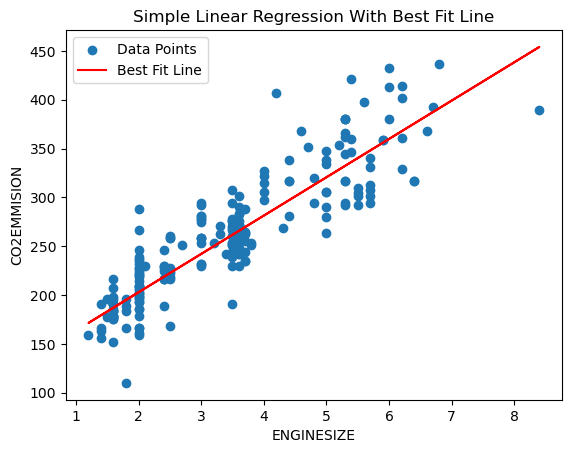

In [95]:
plt.scatter(xtest,ytest, label = "Data Points")
plt.plot(xtest,m * xtest + c , c = 'r' , label = "Best Fit Line")
plt.title("Simple Linear Regression With Best Fit Line")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMMISION")
plt.legend()

In [101]:
df.head(2)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221


Real Life Testing with previous data

In [100]:
truckinfo = [2.4] #with same engine size
slr.predict([truckinfo])

C:\Users\Ujjal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[218.51712676]])

Real Life Testing with new data

In [102]:
truckinfo = [10] #with new engine size
slr.predict([truckinfo])

C:\Users\Ujjal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[516.898448]])

In [103]:
truckinfo = [1] #with new engine size
slr.predict([truckinfo])

C:\Users\Ujjal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[163.55214654]])